In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

In [102]:
df = pd.read_csv('shopping_trends.csv')  # Read the CSV file
df.sample(5)  # Display a random sample of 5 rows from the dataframe

,Customer_ID,Age,category_age,Gender,Item_Purchased,Category,Purchase_Amount(USD),Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
3703,3704,30,Adult,Female,Sandals,Footwear,83,Michigan,S,Teal,Fall,2.9,No,Bank Transfer,Standard,No,No,23,PayPal,Every 3 Months
2373,2374,37,Adult,Male,Hoodie,Clothing,20,Michigan,M,Gray,Spring,4.9,No,Bank Transfer,Express,No,No,21,Debit Card,Every 3 Months
178,179,61,Senior,Male,Skirt,Clothing,43,Idaho,L,Lavender,Fall,4.3,Yes,Debit Card,2-Day Shipping,Yes,Yes,21,PayPal,Quarterly
204,205,24,Young Adult,Male,Sneakers,Footwear,100,Arizona,M,Yellow,Fall,4.0,Yes,PayPal,Store Pickup,Yes,Yes,35,Cash,Bi-Weekly
3442,3443,28,Young Adult,Female,Skirt,Clothing,78,Michigan,M,Violet,Spring,4.3,No,Venmo,Next Day Air,No,No,12,PayPal,Weekly


In [103]:
df.shape  # Display the shape of the dataframe

(3900, 20)

In [104]:
df.info()  # Display information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   category_age              3900 non-null   object 
 3   Gender                    3900 non-null   object 
 4   Item_Purchased            3900 non-null   object 
 5   Category                  3900 non-null   object 
 6   Purchase_Amount(USD)      3900 non-null   int64  
 7   Location                  3900 non-null   object 
 8   Size                      3900 non-null   object 
 9   Color                     3900 non-null   object 
 10  Season                    3900 non-null   object 
 11  Review_Rating             3900 non-null   float64
 12  Subscription_Status       3900 non-null   object 
 13  Payment_Method            3900 non-null   object 
 14  Shipping

In [105]:
df.describe()  # Display descriptive statistics of the dataframe

,Customer_ID,Age,Purchase_Amount(USD),Review_Rating,Previous_Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [106]:
df.describe(include = 'O')

,category_age,Gender,Item_Purchased,Category,Location,Size,Color,Season,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Preferred_Payment_Method,Frequency_of_Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,5,2,25,4,50,4,25,4,2,6,6,2,2,6,7
top,Middle-aged,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Credit Card,Free Shipping,No,No,PayPal,Every 3 Months
freq,1510,2652,171,1737,96,1755,177,999,2847,696,675,2223,2223,677,584


In [107]:
df.isnull().sum()  # Check for missing values in the dataframe

Customer_ID                 0
Age                         0
category_age                0
Gender                      0
Item_Purchased              0
Category                    0
Purchase_Amount(USD)        0
Location                    0
Size                        0
Color                       0
Season                      0
Review_Rating               0
Subscription_Status         0
Payment_Method              0
Shipping_Type               0
Discount_Applied            0
Promo_Code_Used             0
Previous_Purchases          0
Preferred_Payment_Method    0
Frequency_of_Purchases      0
dtype: int64

In [108]:
df.duplicated().sum()  # Check for duplicate rows in the dataframe

np.int64(0)

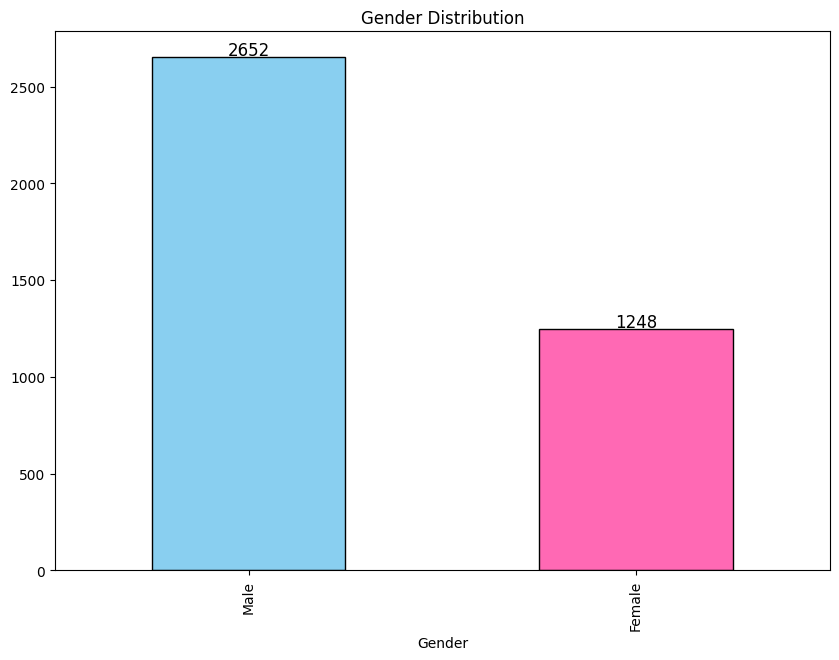

In [109]:
count_gender = df['Gender'].value_counts()  # Count occurrences
ax = count_gender.plot(kind = 'bar' , figsize = (10, 7), color = colors , edgecolor = 'black')
plt.title('Gender Distribution')
for i , value in enumerate(count_gender):
    ax.text(i, value +10  , str(value), ha = 'center', fontsize = 12)


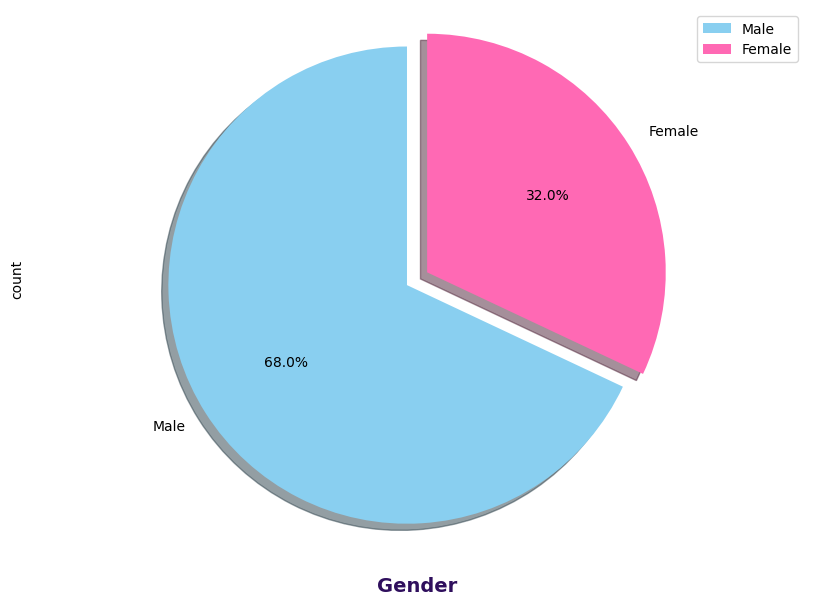

In [110]:
plt.figure(figsize=(20, 6))  # Set the figure size for the pie chart
counts = df['Gender'].value_counts()
explode = (0, 0.1)

counts.plot(kind='pie', autopct='%1.1f%%',  colors=colors , explode=explode, shadow=True, startangle=90, figsize=(10, 7))
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)

plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

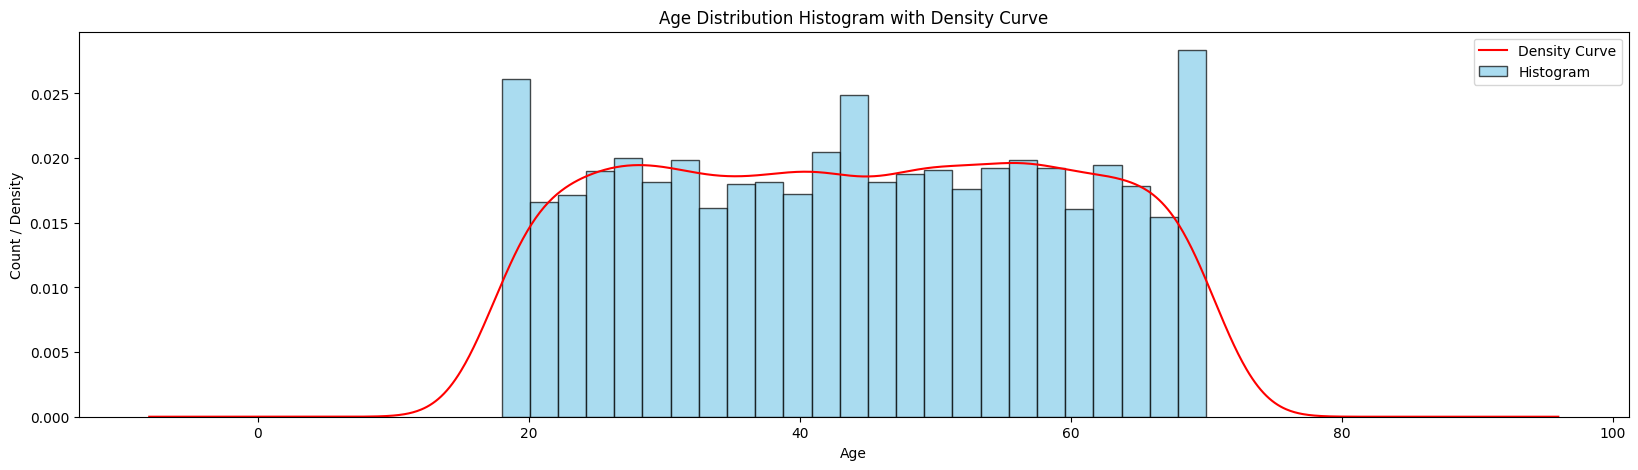

In [111]:

fig , ax = plt.subplots(figsize =(20, 5))
ax.hist(df['Age'], bins=25 , edgecolor='black', alpha = 0.7 , color= 'skyblue',density= True)
df['Age'].plot(kind = 'kde', color = 'red', ax = ax)

ax.set_xlabel('Age')
ax.set_ylabel('Count / Density')
ax.set_title('Age Distribution Histogram with Density Curve')
ax.legend(['Density Curve', 'Histogram'])
plt.show()

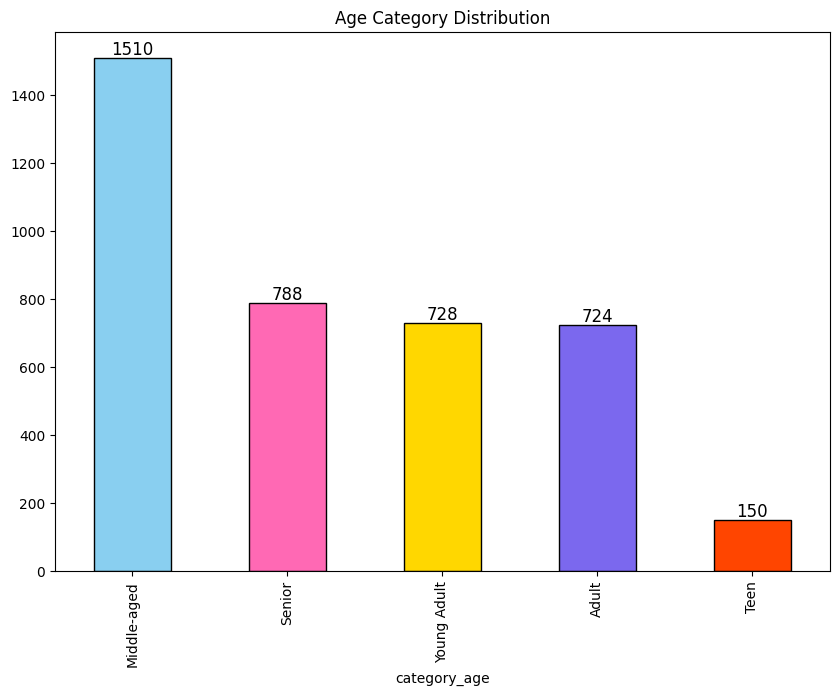

In [112]:
Age_Category = df['category_age'].value_counts()
Age_Category

ax = Age_Category.plot(kind='bar', figsize=(10, 7), color=colors, edgecolor='black')
plt.title('Age Category Distribution')
for i, value in enumerate(Age_Category):
    ax.text(i, value + 10 , str(value),ha = 'center' , fontsize = 12)


In [113]:
df['Category'].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

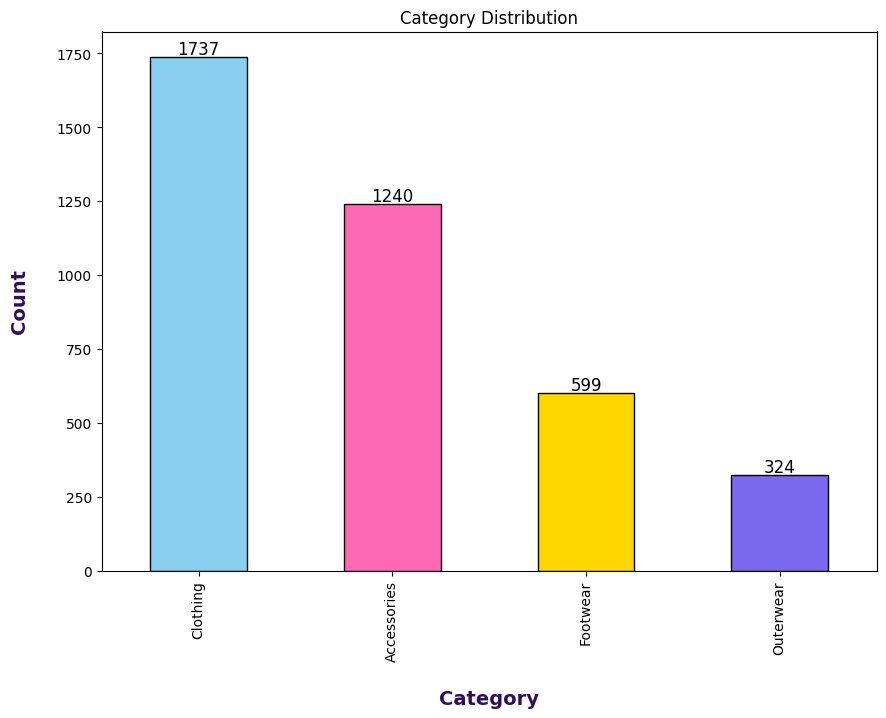

In [114]:
plt.figure(figsize=(20, 6))  # Set the figure size for the pie chart
ax = df['Category'].value_counts().plot(kind='bar', color = colors , edgecolor='black', figsize=(10, 7))
plt.title('Category Distribution')
for i, value in enumerate(df['Category'].value_counts()):
    ax.text(i, value + 10, str(value), ha='center', fontsize=12)    
plt.xlabel('Category', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.ylabel('Count', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.show()

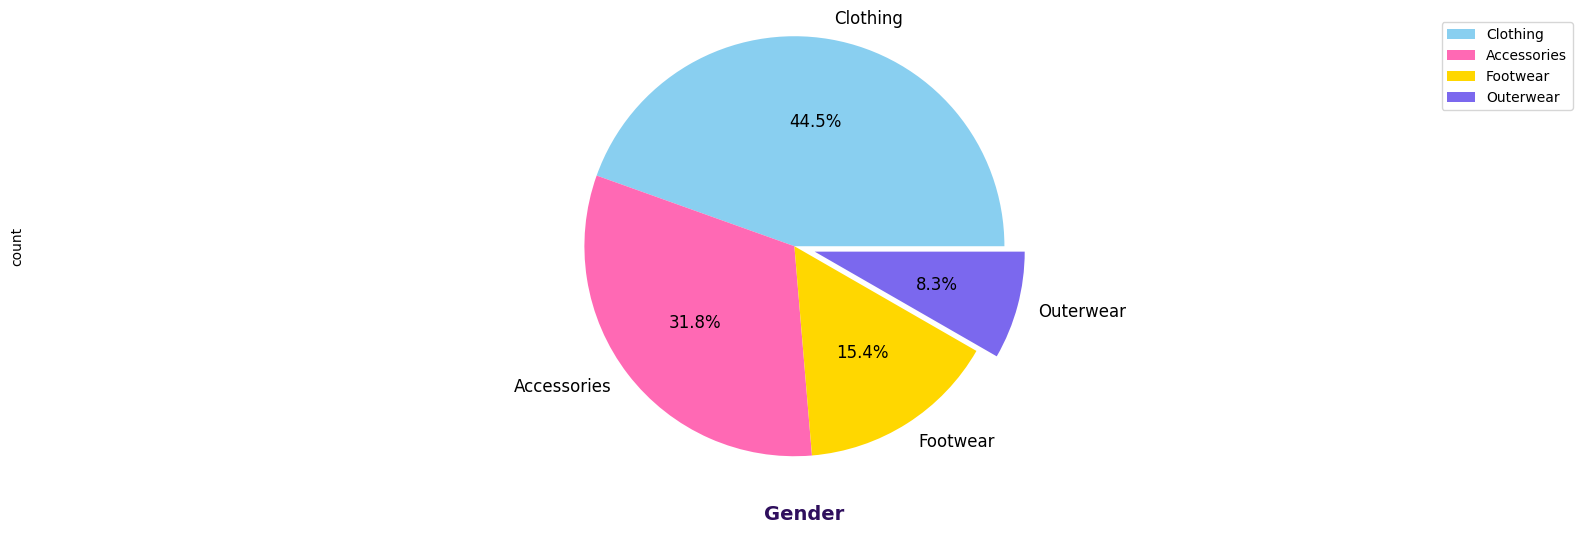

In [115]:
plt.figure(figsize = (20, 6))

counts = df["Category"].value_counts()
explode = (0, 0.0, 0.0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [116]:
df["Color"].value_counts()

Color
Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Charcoal     153
Pink         153
Blue         152
Magenta      152
Purple       151
Peach        149
Red          148
Beige        147
Indigo       147
Lavender     147
Turquoise    145
White        142
Brown        141
Gold         138
Name: count, dtype: int64

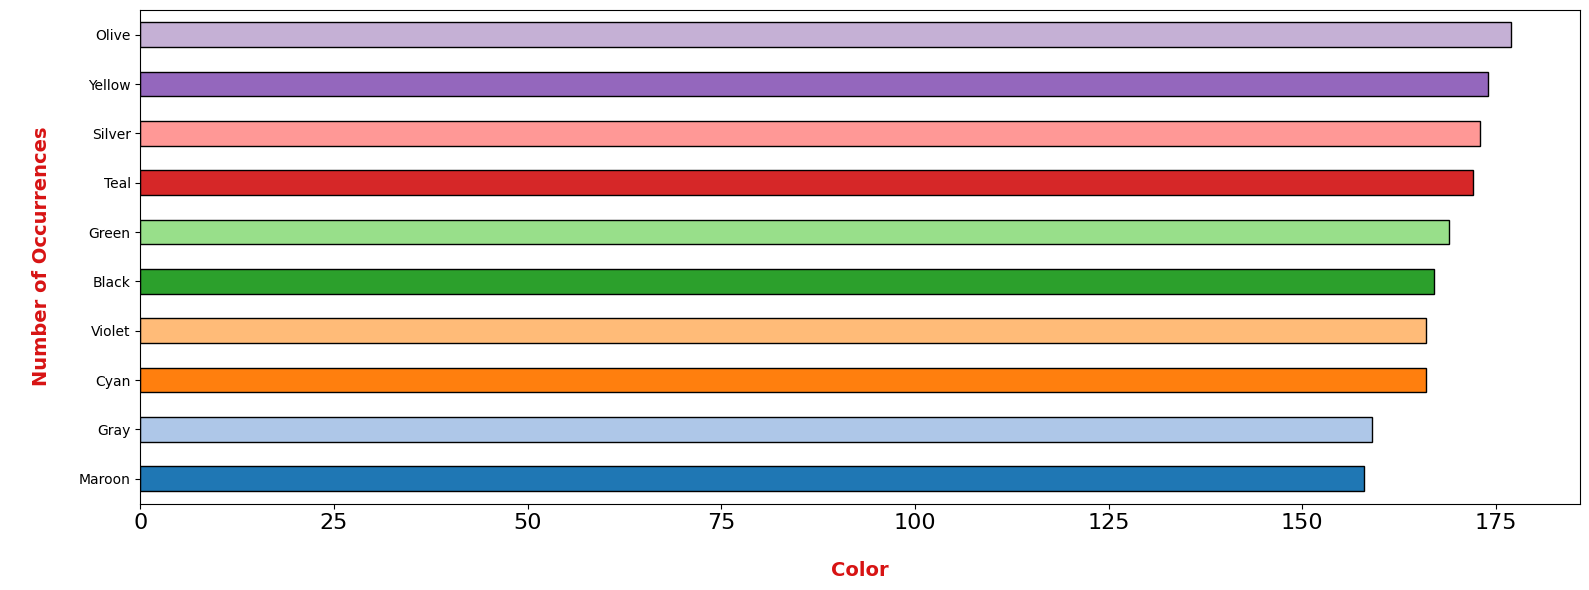

In [117]:
plt.figure(figsize = (16, 6))
df["Color"].value_counts()[:10].sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.xlabel('Color', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('\nNumber of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

In [118]:
df['Season'].value_counts()

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

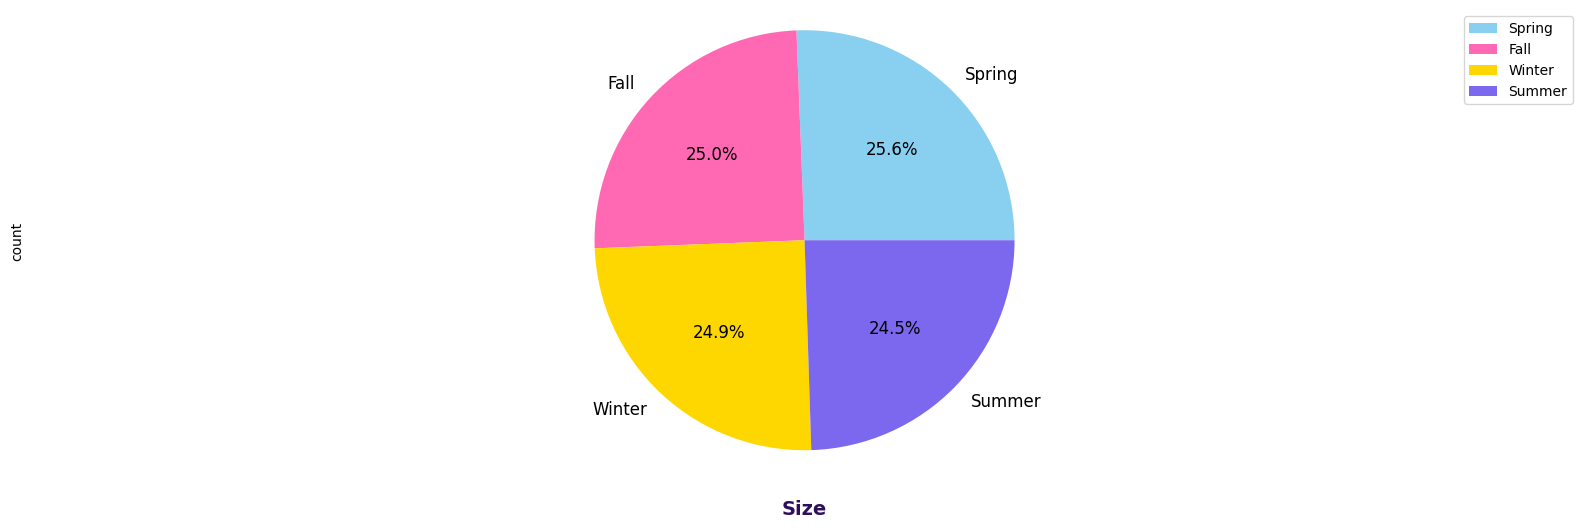

In [119]:
plt.figure(figsize = (20, 6))

counts = df["Season"].value_counts()
explode = (0, 0, 0, 0)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

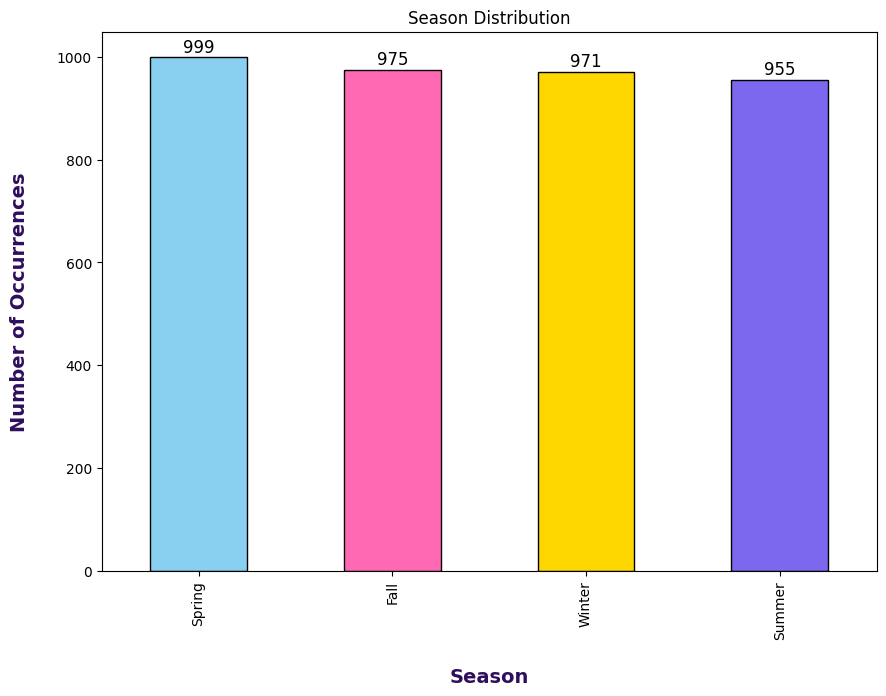

In [120]:
plt.figure(figsize=(20, 6))  # Set the figure size for the pie chart
ax = df['Season'].value_counts().plot(kind='bar', color = colors , edgecolor='black', figsize=(10, 7))
plt.title('Season Distribution')
for i, value in enumerate(df['Season'].value_counts()):
    ax.text(i, value + 10, str(value), ha='center', fontsize=12)    
plt.xlabel('Season' , weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.show()

In [121]:
df['Subscription_Status'].value_counts()

Subscription_Status
No     2847
Yes    1053
Name: count, dtype: int64

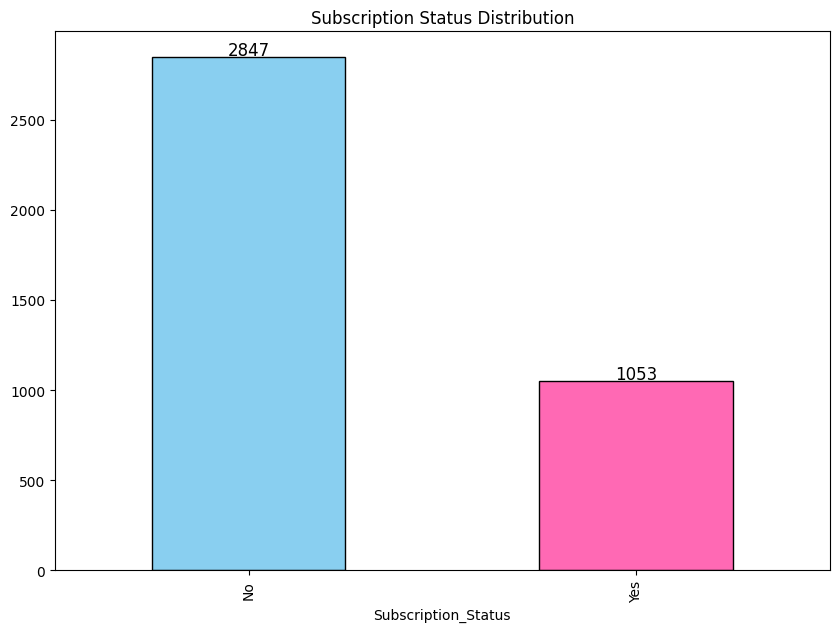

In [122]:
count_subscription = df['Subscription_Status'].value_counts()  # Count occurrences
ax = count_subscription.plot(kind = 'bar' , figsize = (10, 7), color = colors , edgecolor = 'black')
plt.title('Subscription Status Distribution')
for i , value in enumerate(count_subscription):
    ax.text(i, value +10  , str(value), ha = 'center', fontsize = 12)


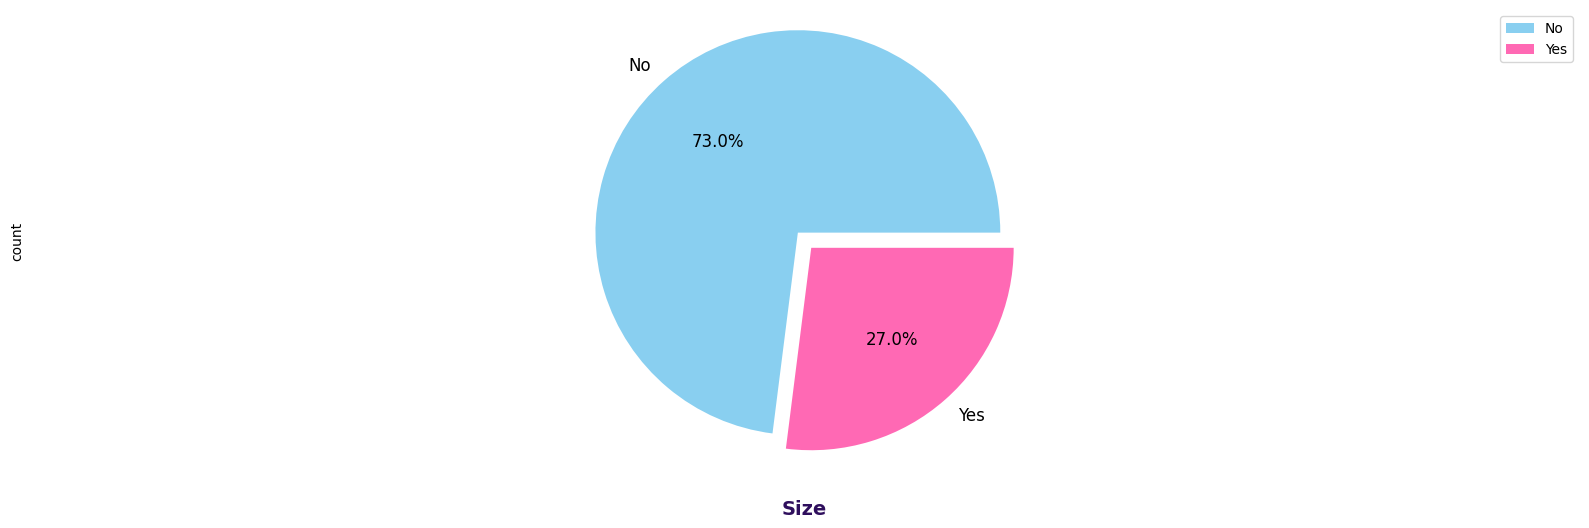

In [124]:
plt.figure(figsize = (20, 6))

counts = df["Subscription_Status"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [126]:
df["Payment_Method"].value_counts()

Payment_Method
Credit Card      696
Venmo            653
Cash             648
PayPal           638
Debit Card       633
Bank Transfer    632
Name: count, dtype: int64

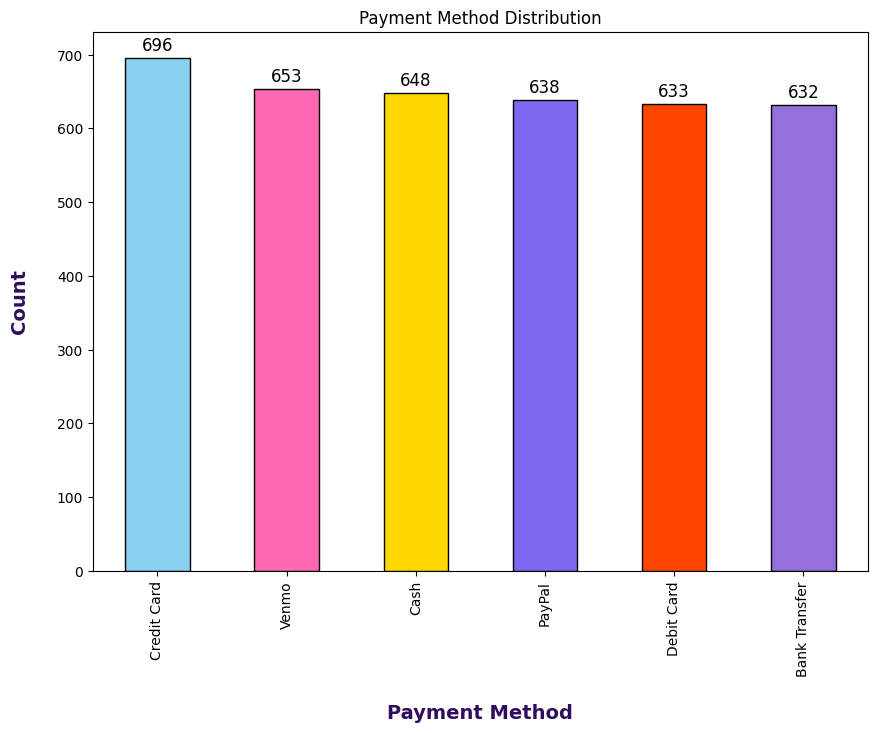

In [ ]:
counts = df['Payment_Method'].value_counts()  # Count occurrences
ax = counts.plot(kind = 'bar' , figsize = (10, 7), color = colors , edgecolor = 'black')
plt.title('Payment Method Distribution')
for i , value in enumerate(counts):
    ax.text(i, value +10  , str(value), ha = 'center', fontsize = 12)

ax.set_xlabel('Payment Method', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
ax.set_ylabel('Count', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.show()

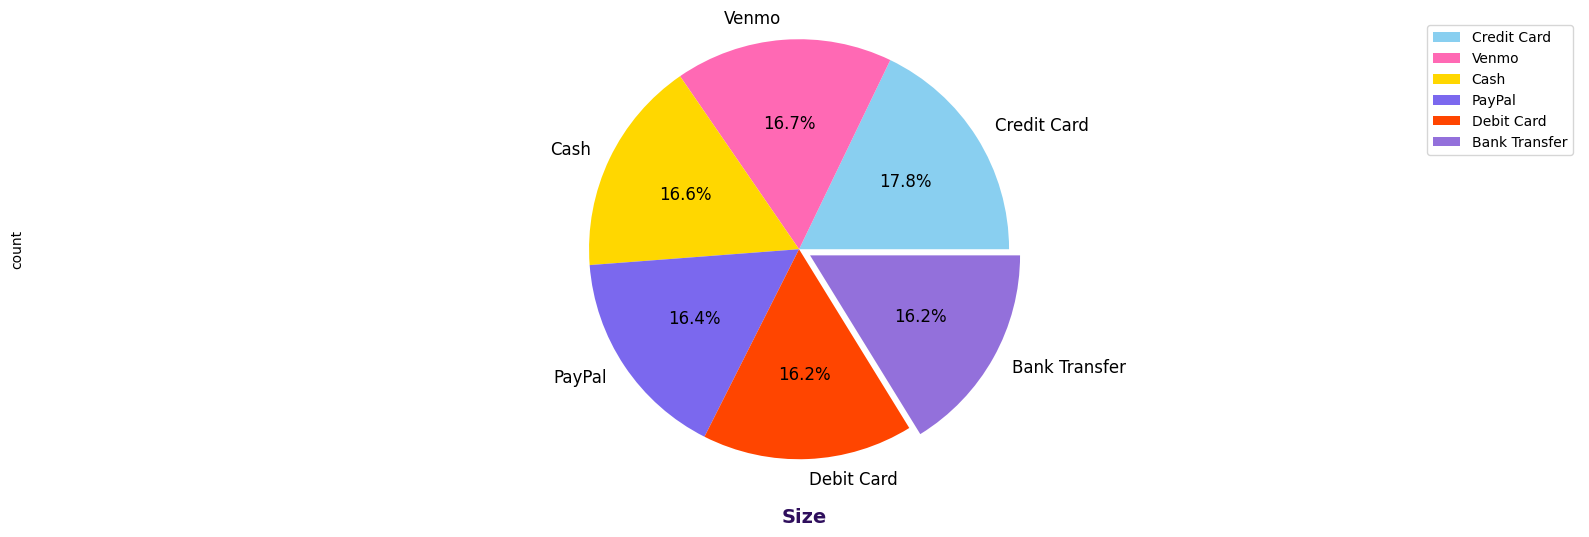

In [133]:
plt.figure(figsize = (20, 6))

counts = df["Payment_Method"].value_counts()
explode = (0, 0, 0, 0, 0.0, 0.06)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [135]:
df["Frequency_of_Purchases"].value_counts()

Frequency_of_Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64

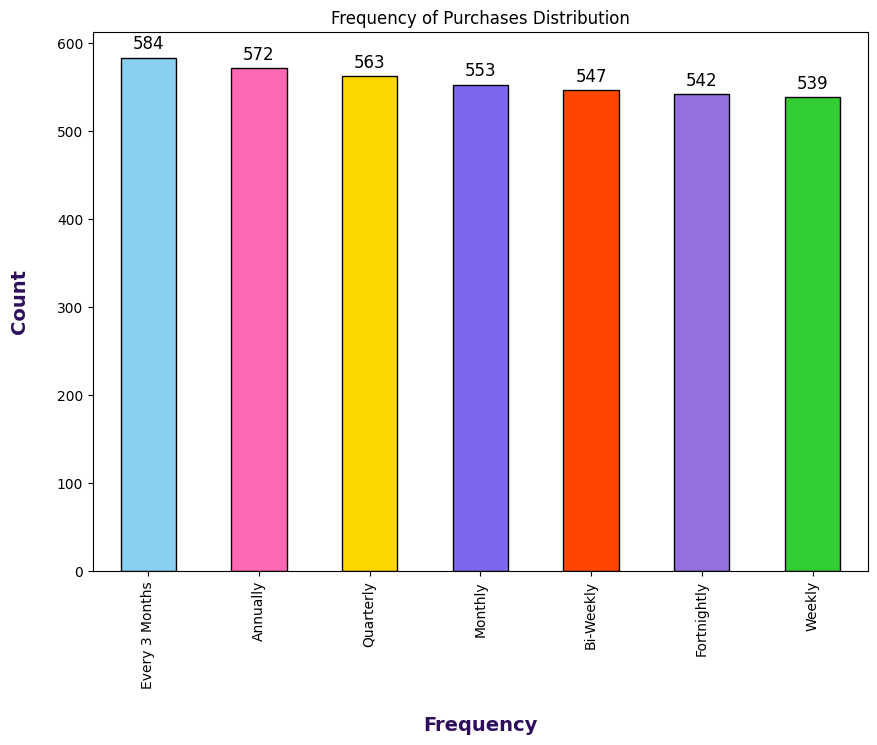

In [136]:
counts = df['Frequency_of_Purchases'].value_counts()  # Count occurrences
ax = counts.plot(kind = 'bar' , figsize = (10, 7), color = colors , edgecolor = 'black')
plt.title('Frequency of Purchases Distribution')
for i , value in enumerate(counts):
    ax.text(i, value +10  , str(value), ha = 'center', fontsize = 12)

ax.set_xlabel('Frequency', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
ax.set_ylabel('Count', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.show()

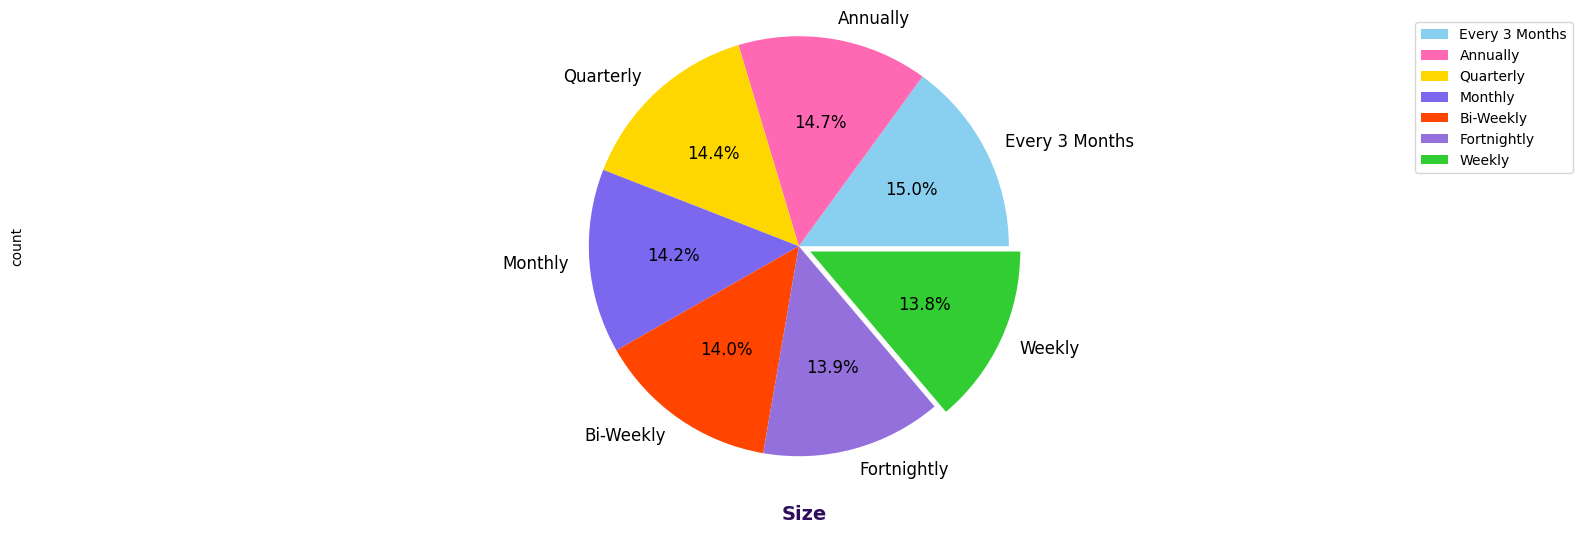

In [138]:
plt.figure(figsize = (20, 6))

counts = df["Frequency_of_Purchases"].value_counts()
explode = (0, 0, 0, 0, 0.0, 0, 0.06)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>What is the average age of customers in the dataset ?</b>
</div>

In [141]:
avarge_age = df['Age'].mean()
print(f"The average age of customers is: {avarge_age:.2f} years")  # Print the average age of customers

The average age of customers is: 44.07 years


<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>What is the most common item purchased ?</b>
</div>

In [142]:
Most_Common_Item_Purchased = df['Item_Purchased'].mode()[0] # Get the most common item purchased
print(f"The most common item purchased is: {Most_Common_Item_Purchased}")  # Print the most common item purchased

The most common item purchased is: Blouse


<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>What is the total purchase amount for each category ?</b>
</div>

In [144]:
Total_amount_for_each_category = df.groupby('Category')['Purchase_Amount(USD)'].sum().sort_values(ascending=False)
print("Total amount for each category:")
print(Total_amount_for_each_category)  # Print the total amount for each category

Total amount for each category:
Category
Clothing       104264
Accessories     74200
Footwear        36093
Outerwear       18524
Name: Purchase_Amount(USD), dtype: int64


<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>What is the average review rating for male customers and female customers separately ?</b>
</div>

In [147]:
average_rating_male = df[df['Gender'] == 'Male']['Review_Rating'].mean()  # Calculate average rating for 
average_rating_female = df[df['Gender'] =='Female'] ['Review_Rating'].mean()  # Calculate average rating
print(f"Average rating for Male customers: {average_rating_male}")
print(f"Average rating for Female customers: {average_rating_female}")  # Print the average rating for


Average rating for Male customers: 3.7539592760180995
Average rating for Female customers: 3.741426282051282


<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>What is the most common payment method used by customers ?</b>
</div>

In [148]:
Most_Common_Pyment_Method = df['Payment_Method'].mode()[0]  # Get the most common payment method
print(f"The most common payment method is: {Most_Common_Pyment_Method}")  # Print the most common payment method

The most common payment method is: Credit Card


<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>What is the median purchase amount (USD) ?</b>
</div>

In [149]:
Median_Purches_Amount = df['Purchase_Amount(USD)'].median() # Calculate the median purchase amount
print(f"The median purchase amount is: {Median_Purches_Amount:.2f} USD")  # Print the median purchase amount

The median purchase amount is: 60.00 USD


<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>How many customers have opted for the Subscription ?</b></div>

In [152]:
subscription_count = df[df['Subscription_Status'] == 'Yes']['Customer_ID'].count()
print("Number of Customers with Subscription: ", subscription_count)

Number of Customers with Subscription:  1053


<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>What is the average purchase amount for customers with a subscription status of 'Yes' and 'No' ?</b></div>

In [ ]:
average_purchase_amount_subscription = df[df['Subscription_Status'] == 'Yes']['Purchase_Amount(USD)'].mean()  # Calculate average purchase amount for customers with subscription
average_purchase_amount_not_subscription = df[df['Subscription_Status'] == 'No']['purchase_amount(USD)'].mean()  # Calculate average purchase amount for customers with  not subscription
print(f"Average purchase amount for customers with subscription: {average_purchase_amount_subscription:.2f} USD")
print(f"Average purchase amount for customers without subscription: {average_purchase_amount_not_subscription:.2f} USD")


KeyError: 'purchase_amount(USD)'